<a href="https://colab.research.google.com/github/abriyanyusuf/Old_Car_Price_Prediction/blob/main/Old_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyek Pertama : Predictive Analysis - Kelas Machine Learning Terapan Dicoding Academy

####Nama : Abriyan Yusuf
####username dicoding : abriyanyusuf05


#1. Business Understanding

Dataset : https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

Mobil bekas merupakan suatu barang yang masih memiliki nilai ekonomis cukup menjanjikan. Sebagai perusahaan yang bergerak di dalam bidang jual beli mobil tua maka kita perlu suatu sistem yang dapat memprediksi nilai atau harga dari mobil tua yang akan kita beli dan kita jual kembali agar perusahaan mendapatkan keuntungan yang optimal.

## 1.1 Problem Statements and Goals

Berdasarkan kondisi yang telah diuraikan sebelumnya, perusahaan akan mengembangkan sebuah sistem prediksi harga mobil tua untuk menjawab permasalahan berikut :
- Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap harga mobil tua?
- Berapa harga pasar mobil tua dengan karakteristik atau fitur tertentu?

Untuk menjawab pertanyaan tersebut, kita akan membuat predictive modelling dengan tujuan atau goals sebagai berikut :
- Mengetahui fitur yang paling berkorelasi dengan harga mobil tua
- Membuat model machine learning yang dapat memprediksi harga mobil tua seakurat mungkin berdasarkan fitur-fitur yang ada


## 1.2 Metodologi
Prediksi harga adalah tujuan yang ingin kita capai. Harga merupakan variabel kontinu. Dalam predictive analytics, ketika membuat prediksi variabel kontinu maka kita sedang menyelesaikan **permasalahan regresi**. Oleh karena itu metodologi dalam proyek ini adalah membangun model regresi dengan harga mobil tua sebagai target.


## 1.3 Metrik
Metrik digunakan untuk mengevaluasi seberapa baik model yang kita buat dalam memoprediksi harga. Untuk kasus regresi, beberapa metrik yang umum digunakan diantaranya:
- Mean Squared Error (MSE), atau
- Root Mean Square Error (RMSE)
Secara umum kedua metrik tersebut mengukur seberapa jauh hasil prediksi dengan nilai sebenarnya.

Pengembangan model juga akan menggunakan beberapa algoritma machine learning diantaranya
- K-Nearest Neighbor
- Random Forest
- Boosting Algorithm
Dari ketiga model tersebut akan dipilih satu model yang memiliki **nilai kesalahan prediksi terkecil**. Dengan kata lain kita akan membuat model seakurat mungkin yang model dengan kesalahan sekecil mungkin.

#2. Data Understanding

Data yang digunakan dalam proyek ini adalah dataset yang bersumber dari kaggle bernama `Old Car Price Prediction`. Dataset ini terdiri dari 9 kolom diantaranya
1. `car_name` yang berisi data nama kendaraan
2. `car_prices_in_rupee` yang berisi data nominal harga dari kendaraan dalam rupee dimana terdapat harga dengan nominal `Lakh` yang sama dengan konstanta 100.000 (seratus ribu) dan `Crore` sama dengan konstatnta 10.000.000 (sepuluh juta).
3. `kms_driven` yang berisi data jumlah kilometer yang telah ditempuh
4. `fuel_type` yang berisi data tipe bahan bakar kendaraan
5. `transmission` yang berisi data tipe transmisi kendaraan
6. `ownership` yang berisi data jumlah pemilik sebelumnya dimulai dari 1st Owner - 5th Owner
7. `manufacture` yang berisi data tahun pembuatan kendaraan
8. `engine` yang berisi data kapasitas mesin kendaraan dalam cc
9. `Seats` yang berisi data kapasitas tempat duduk dalam kendaraan dimulai dari 2 Seats - 8 Seats

Dataset tersebut memuat 5511 entri data

Tahapan selanjutnya, kita akan melakukan proses Data Preparation



#3. Data Preparation

Pada tahapan ini kita akan melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Terdapat 7 tahapan umum dalam Data Preparation diantaranya :
1. Data Loading
2. Data Cleaning
3. Exploratory Data Analysis
4. Encoding Fitur Kategori
5. Reduksi dimensi dengan PCA
6. Pembagian dataset dengan fungsi train_test_split dari library `sklearn`
7. Standardisasi

## 3.1. Data Loading

###3.1 Kredensial Akun Kaggle

Untuk mendownload dataset dari Kaggle diperlukan library kaggle serta tahapan pembuatan direktori kaggle dan pengunggahan kredensial/token akun kaggle kita. Proses tersebut akan memuungkinkan kita untuk mendownload dataset dari Kaggle secara langsung serta mengekstraknya.

sebelum menjalankan kode di bawah ini pastikan kita sudah mengupload kaggle.json ke dalam direktori colab kita.

Dataset : https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download milanvaddoriya/old-car-price-prediction

  0% 0.00/105k [00:00<?, ?B/s]
100% 105k/105k [00:00<00:00, 54.7MB/s]


In [6]:
! unzip old-car-price-prediction.zip

Archive:  old-car-price-prediction.zip
  inflating: car_price.csv           


## 3.2. Data Cleaning
Dalam tahapan ini kita akan melakukan proses pembersihan data seperti menghilangkan atribut dalam entri dan serta melakukan konversi tipe data

### 3.0 Membersihkan Unnamed Kolom

In [7]:
#Mengimpor library yang digunakan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [8]:
data = pd.read_csv('car_price.csv')
data.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


Terlihat bahwa terdapat kolom berisikan Unnamed data. Kita akan mengapus kolom pertama yang berisikan nomor masing-masing data (`Unnamed`) tersebut dengan menggunakan kode di bawah ini

In [9]:
data.drop(data.columns[[0]], axis = 1, inplace = True)

In [10]:
#Memeriksa ulang data setelah melakukan penghapusan unnamed
data.head()

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


Selanjutnya kita ingin melakukan pembersihan atribut entri data diantaranya:
1. Mengubah Lakh dan Crore menjadi pengali masing-masing 100000 dan 10000000 kemudian mengalikannya dengan harga masing-masing sehingga akan didapatkan harga sesungguhnya dari kendaraan

2. Menghilangkan atribut kms pada entri data `kms_driven` dan menghilangkan tanda koma pada masing-masing entry data

3. Menghilangkan atribut `st Owner`, `nd Owner`, `rd Owner`, `th Owner`pada kolom `ownership` sehingga kita hanya akan mendapatkan data berupa angka saja

4. Menghapus atribut `cc` pada kolom engine

5. Menghapus atribut `Seats` pada kolom `Seats`

###3.1 Membersihkan Kolom car_prices_in_rupee

In [11]:
# memisahkan car_prices ke price dan multiply
data[['price', 'multiply']] = data['car_prices_in_rupee'].str.split(' ', 1, expand=True)
data.drop('car_prices_in_rupee', axis=1, inplace=True)

<ipython-input-11-fa1be24b027f>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['price', 'multiply']] = data['car_prices_in_rupee'].str.split(' ', 1, expand=True)


In [12]:
data.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
0,Jeep Compass 2.0 Longitude Option BSIV,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,10.03,Lakh
1,Renault Duster RXZ Turbo CVT,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,12.83,Lakh
2,Toyota Camry 2.5 G,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,16.40,Lakh
3,Honda Jazz VX CVT,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,7.77,Lakh
4,Volkswagen Polo 1.2 MPI Highline,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,5.15,Lakh


In [13]:
# Mengkonversi kolom multiply ke numerical value
data['multiply']=data['multiply'].str.replace('Lakh','100000')
data['multiply']=data['multiply'].str.replace('Crore','10000000')
data['multiply'] = pd.to_numeric(data['multiply'])

In [14]:
data.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
0,Jeep Compass 2.0 Longitude Option BSIV,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,10.03,100000.0
1,Renault Duster RXZ Turbo CVT,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,12.83,100000.0
2,Toyota Camry 2.5 G,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,16.40,100000.0
3,Honda Jazz VX CVT,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,7.77,100000.0
4,Volkswagen Polo 1.2 MPI Highline,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,5.15,100000.0


In [15]:
#Mendapatkan price dalam nilai sebenarnya dengan mengalikan masing
#masing entri price dengan multiply
data['price']=data['price'].str.replace(',','')
data['price'] = pd.to_numeric(data['price'])
data['price'] = data['price'] * data['multiply']

In [16]:
data.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,multiply
0,Jeep Compass 2.0 Longitude Option BSIV,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,1003000.0,100000.0
1,Renault Duster RXZ Turbo CVT,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1283000.0,100000.0
2,Toyota Camry 2.5 G,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1640000.0,100000.0
3,Honda Jazz VX CVT,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,777000.0,100000.0
4,Volkswagen Polo 1.2 MPI Highline,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,515000.0,100000.0


In [17]:
#Menghilangkan kolom multiply
data = data.drop(columns=["multiply"], axis=1)

In [18]:
data.head()

,car_name,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price
0,Jeep Compass 2.0 Longitude Option BSIV,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,1003000.0
1,Renault Duster RXZ Turbo CVT,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1283000.0
2,Toyota Camry 2.5 G,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1640000.0
3,Honda Jazz VX CVT,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,777000.0
4,Volkswagen Polo 1.2 MPI Highline,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,515000.0


Baik sekarang untuk kolom harga telah berhasil kita bersihkan. Selanjutnya kita akan mengganti nan dengan zero dan inf dengan angka berhingga karena input terlalu besar untuk training data

In [19]:
data['price'] = np.nan_to_num(data['price'])

###3.2 Membersihkan Kolom car_name dan Menyesuaikannya

Dalam kolom car_name terdapat nama pabrikan (manufacturer) dan model kendaraan. Sebagai contoh "Honda Jazz VX CVT" maka:
- Manufacturer = Honda
- Model = Jazz

Kita ingin membuat kolom data baru yang berisi data manufacturer dan model yang didapatkan dari kolom car_name. Kita tidak ingin menggunakan nama setelah nama model seperti "VX CVT" untuk mempermudah proses analisis.



In [20]:
# renaming car_name sebagai model
# creating a column as manufacturer
# only model name
data.rename(columns={'car_name': 'model'}, inplace=True)
data['manufacturer'] = data['model'].map(lambda x: str(x).strip().split(" ")[0])
data['model'] = data['model'].map(lambda x: str(x).strip().split(" ")[1])

In [21]:
data.head()

,model,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,price,manufacturer
0,Compass,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,1003000.0,Jeep
1,Duster,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,1283000.0,Renault
2,Camry,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,1640000.0,Toyota
3,Jazz,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,777000.0,Honda
4,Polo,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,515000.0,Volkswagen


In [22]:
data['manufacturer'].value_counts()

Maruti           1389
Hyundai          1023
Honda             498
Mahindra          315
Mercedes-Benz     283
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Audi              166
Volkswagen        159
Skoda             113
Chevrolet          82
Nissan             63
MG                 62
Kia                61
Land               50
Jeep               49
Volvo              31
Jaguar             30
Datsun             25
Fiat               17
Mini               14
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            5
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: manufacturer, dtype: int64

Dapat kita lihat bahwa datanya menjadi lebih sederhana bukan?

###3.3 Membersihkan kolom kms dan menyesuaikannya

Selanjutnya, kita ingin membersihkan data pada kolom kms dengan menghapus atribut "kms" setelah angka, menghilangkan tanda koma, dan mengkonversi ke numeric value

In [23]:
data['kms_driven'] = data['kms_driven'].map(lambda x: x.rstrip(' kms'))
data['kms_driven'] = data['kms_driven'].map(lambda x: x.replace(',', ''))
data['kms_driven'] = pd.to_numeric(data['kms_driven'])

###3.4 Membersihkan kolom engine dan menyesuaikannya

Kemudian, kita ingin membersihkan data pada kolom engine dengan menghapus atribut "cc" dan mengkonversi datanya ke numerical value

In [24]:
data['engine'] = data['engine'].map(lambda x: x.rstrip(' cc'))
data['engine'] = pd.to_numeric(data['engine'])

###3.5 Membersihkan kolom seats dan menyesuaikannya

kita ingin membersihkan data pada kolom seats dengan menghapus atribut "Seats" dan mengonversinya ke numerical value

In [25]:
data['Seats'] = data['Seats'].map(lambda x: x.rstrip(' Seats'))
data['Seats'] = pd.to_numeric(data['Seats'])

###3.6 Membersihkan kolom ownership dan menyesuaikannya

In [26]:
data['ownership'] = data['ownership'].apply(lambda x: x.rstrip('st Owner'))
data['ownership'] = data['ownership'].apply(lambda x: x.rstrip('nd Owner'))
data['ownership'] = data['ownership'].apply(lambda x: x.rstrip('rd Owner'))
data['ownership'] = data['ownership'].apply(lambda x: x.rstrip('th Owner'))

#konversi ke numerical value
data['ownership'] = pd.to_numeric(data['ownership'])

In [27]:
data['ownership'].value_counts()

1    3736
2    1314
3     359
4      84
5      12
0       7
Name: ownership, dtype: int64

###3.7 Mengganti nama kolom manufacture menjadi year

In [28]:
data.rename(columns={'manufacture': 'year'}, inplace=True)

##3.3. Exploratory Data Analysis

Tahapan EDA merupakan tahapan awal untuk menganalisis karakteristik, pola, anomali, dan memeriksa asumsi pada data

#### 3.3.1 Deskripsi Variabel

Tahapan ini dilakukan untuk mengetahui informasi variabel dari dataset diantaranya jumnlah kolom, jumlah data, nama kolom, jumlah data per kolom, dan tipe data

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5512 non-null   object 
 1   kms_driven    5512 non-null   int64  
 2   fuel_type     5512 non-null   object 
 3   transmission  5512 non-null   object 
 4   ownership     5512 non-null   int64  
 5   year          5512 non-null   int64  
 6   engine        5512 non-null   int64  
 7   Seats         5512 non-null   int64  
 8   price         5512 non-null   float64
 9   manufacturer  5512 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 430.8+ KB


Dari output tersebut terlihat bahwa:
1. Terdapat 4 kolom bertipe object yaitu : model, fuel_type, transmission, dan year.
2. Terdapat 5 kolom numerik bertipe data int64 yaitu : kms_driven, ownership, year, engine, dan Seats
3. Terdapat 1 kolom numerik bertipe data float64 yaitu : price

Uraian di atas telah menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai. Selanjutnya, kita akan mengecek deskripsi statistik dengan fitur describe()

#### 3.3.2 Deskripsi Statistik

Pada tahapan ini, kita ingin mengetahui deskripsi statistik dari dataset

In [30]:
data.describe()

,kms_driven,ownership,year,engine,Seats,price
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5.512000e+03
mean,63211.888062,1.421807,2015.455552,1532.299710,5.250726,1.160819e+06
std,41844.131167,0.703092,3.927974,579.210876,0.720075,1.970882e+06
min,250.000000,0.000000,1995.000000,0.000000,2.000000,0.000000e+00
25%,33151.750000,1.000000,2013.000000,1197.000000,5.000000,3.150000e+05
50%,59000.000000,1.000000,2016.000000,1396.000000,5.000000,5.500000e+05
75%,84265.250000,2.000000,2018.000000,1950.000000,5.000000,1.025750e+06
max,560000.000000,5.000000,2022.000000,5950.000000,8.000000,1.920000e+07


Kode di atas hanya akan menampilkan deskripsi statistik dari kolum bertipe data float64. Berdasarkan output di atas, didapatkan deskripsi statistik sebagai berikut :

1. Count : Jumlah sampel data
2. Mean : Nilai rerata
3. STD : Standar Deviasi
4. Min : Nilai minimum
5. 25% : Kuartil bawah atau Q1
6. 50% : Kuartil tengah atau Q2 atau Median
7. 75% : Kuartil atas / Q3
8. Max : Nilai Maksimum



#### 3.3.3 Menangani Missing Value

Dari hasil fungsi describe(), nilai minimum untuk kolom `ownership`, `engine`, dan `price` adalah 0. Seperti kita tahu bahwa dataset merupakan data kendaraan tua sehingga tidak mungkin ada data owner ship yang bernilai 0. Kemudian tidak mungkin ada kendaraan yang kapasitas mesinnya 0, dan tidak mungkin ada kendaraan yang harga jualnya 0. Kita akan memeriksa berapa banyak nilai 0 pada masing-masing kolom tersebut.

In [31]:
ownership = (data.ownership == 0).sum()
engine = (data.engine == 0).sum()
price = (data.price == 0).sum()


print("Nilai 0 di kolom ownership ada: ", ownership)
print("Nilai 0 di kolom engine ada: ", engine)
print("Nilai 0 di kolom price ada: ", price)


Nilai 0 di kolom ownership ada:  7
Nilai 0 di kolom engine ada:  12
Nilai 0 di kolom price ada:  123


Selanjutnya kita akan memeriksa apakah data bernilai - pada salah satu kolom juga terdapat pada kolom lain? Kita akan memeriksa dari kolom price yang memiliki missing value terbanyak

In [32]:
data.loc[(data['price'] == 0)]

,model,kms_driven,fuel_type,transmission,ownership,year,engine,Seats,price,manufacturer
238,Swift,80000,Petrol,Manual,3,2007,1298,5,0.0,Maruti
243,Zen,90000,Petrol,Manual,3,2002,993,5,0.0,Maruti
342,Alto,70229,Petrol,Manual,4,2008,796,5,0.0,Maruti
675,Esteem,60000,Petrol,Manual,1,2007,1497,5,0.0,Maruti
734,Santro,80000,Petrol,Manual,2,2008,2993,5,0.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...
5050,Wagon,166155,Petrol,Manual,2,2008,1461,5,0.0,Maruti
5094,Spark,89133,Petrol,Manual,1,2009,1497,5,0.0,Chevrolet
5149,Spark,192340,Lpg,Manual,2,2010,1390,5,0.0,Chevrolet
5177,Indica,130265,Diesel,Manual,2,2013,1197,5,0.0,Tata


Setelah kita memeriksanya ternyata seluruh data bernilai nol pada kolom price tidak memiliki nilai nol pada kolom engine dan ownership. Ada beberapa teknik untuk menangani missing value ini diantaranya menghapus atau melakukan drop terhadap data yang hilang, menggantinya dengan mean atau median, serta memprediksi dan mengganti nilainya dengan teknik regresi [22].

Namun, apabila kita lihat jumlah 123 dibandingkan pada 5511 data dapat dikatakan relatih kecil dan tidak berdampak siginifikan karena data 123 data tersebut hanya bernilai sekitar 2% dari data sehingga kita dapat menghapusnya saja dengan melakukan drop. Hal yang sama akan kita lakukan pada data bernilai nol di kolom engine dan ownership

In [33]:
# Drop baris dengan nilai droppi = 0
data = data.loc[(data[['ownership','price','engine']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
data.shape

(5370, 10)

Setelah baris bernilai 0 dihapus, jumlah sapel atau baris data berubah menjadi 5370. Kita akan memeriksa lagi dengan fungsi describe() untuk memastikan tidak ada nilai 0 lagi pada kolom engine, ownership, dan price

In [34]:
data.describe()

,kms_driven,ownership,year,engine,Seats,price
count,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5.370000e+03
mean,62964.664618,1.408007,2015.638920,1537.955493,5.251583,1.184872e+06
std,41888.262990,0.682792,3.713247,577.953728,0.720494,1.985343e+06
min,250.000000,1.000000,1995.000000,624.000000,2.000000,1.000000e+05
25%,32982.000000,1.000000,2013.000000,1197.000000,5.000000,3.250000e+05
50%,58485.500000,1.000000,2016.000000,1396.000000,5.000000,5.605000e+05
75%,84000.000000,2.000000,2018.000000,1950.000000,5.000000,1.050000e+06
max,560000.000000,5.000000,2022.000000,5950.000000,8.000000,1.920000e+07


Nilai minimum pada ketiga kolom tersebut sudah bukan 0 lagi. Kita bisa lanjutkan ke tahapan selanjutnya yaitu menangani outliers

#### 3.3.4 Menangani Outliers

Menurut Kuhn dan Johnson dalam Applied Predictive Modeling [23], outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Ia adalah hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya.

Terdapat beberapa teknik untuk menangani outliers, antara lain:
- Hypothesis Testing
- Z-score method
- IQR method

Dalam kasus ini, kita akan mendeteksi outliers dengan teknik visualisasi data menggunakan **boxplot**. Kemudian kita akan menangani outliers dengan teknik IQR atau Inter Quarlite Range. Kuartil dalam siati populasi adalah tiga nilai yang membagi distribusi data menjadi empat sebaran. Seperempat berada di di bawah kuartil pertama Q1, setengah dari data berada di kuartil kedua Q2, dan tiga perempat dari data berada di kuartil ketiga. Dengan demikian IQR = Q3 - Q1.

Kemudian kita akan mengecek outliers dengan teknik visualisasi boxplot. Menurut Seltman dalam “Experimental Design and Analysis” [24], boxplot menunjukkan ukuran lokasi dan penyebaran, serta memberikan informasi tentang simetri dan outliers. Boxplot bisa digambarkan secara vertikal maupun horizontal.

Sekarang kita akan memvisualisasikan data dengan boxplot untuk mendeteksi outliers pada beberapa fitur numerik.

<Axes: xlabel='price'>

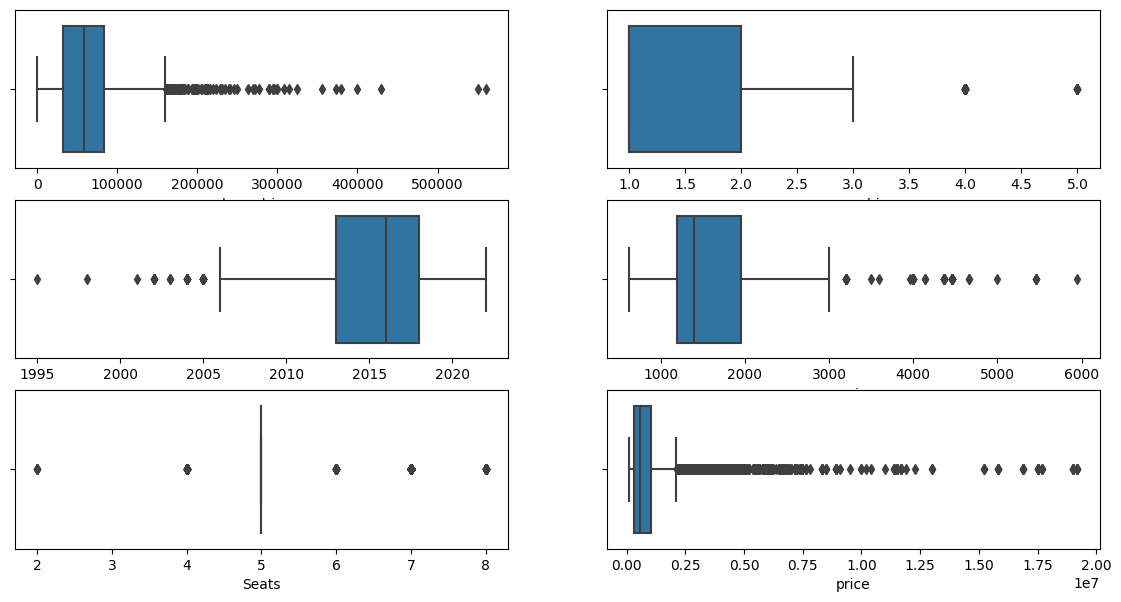

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=data.kms_driven)
sns.boxplot(ax=axes[0, 1], x=data.ownership)
sns.boxplot(ax=axes[1, 0], x=data.year)
sns.boxplot(ax=axes[1, 1], x=data.engine)
sns.boxplot(ax=axes[2, 0], x=data.Seats)
sns.boxplot(ax=axes[2, 1], x=data.price)




Dari output di atas dapat dilihat bahwa pada beberapa fitur numerik terdapat ourliers. Kita akan menangani outliers dengan IQR. IQR digunakan untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apapun yang berada di luar batas ini akan dianggap sebagai outliers.

  

In [36]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
data.shape

<ipython-input-36-6a6263725a79>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-36-6a6263725a79>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-36-6a6263725a79>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]


(3801, 10)

Dataset berhasil dibersihkan dari outliers dan saat ini memiliki 3.801 sampel.

#### 3.3.5 Univariate Analysis
Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate EDA. Langkah pertama, kita akan membagi fitur pada dataset menjadi dua bagian yaitu numerical features dan categorical features.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 5509
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3801 non-null   object 
 1   kms_driven    3801 non-null   int64  
 2   fuel_type     3801 non-null   object 
 3   transmission  3801 non-null   object 
 4   ownership     3801 non-null   int64  
 5   year          3801 non-null   int64  
 6   engine        3801 non-null   int64  
 7   Seats         3801 non-null   int64  
 8   price         3801 non-null   float64
 9   manufacturer  3801 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 326.6+ KB


In [38]:
numerical_features = ['kms_driven', 'ownership', 'year', 'engine', 'Seats', 'price']
categorical_features = ['model', 'fuel_type', 'transmission', 'manufacturer']

##### a. Categorical Features

           jumlah sampel  persentase
Swift                312         8.2
i20                  209         5.5
City                 190         5.0
Wagon                164         4.3
Alto                 146         3.8
...                  ...         ...
Aria                   1         0.0
Ssangyong              1         0.0
MU                     1         0.0
Supro                  1         0.0
A                      1         0.0

[180 rows x 2 columns]


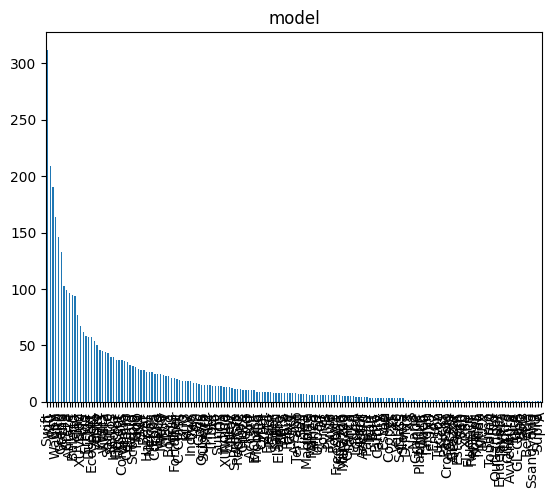

In [39]:
#Fitur Model
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 180 kategori pada fitur model dimana jumlah terbanyak yaitu Swift dengan persentase 8.2%.

          jumlah sampel  persentase
Petrol             2238        58.9
Diesel             1470        38.7
Cng                  67         1.8
Lpg                  19         0.5
Electric              7         0.2


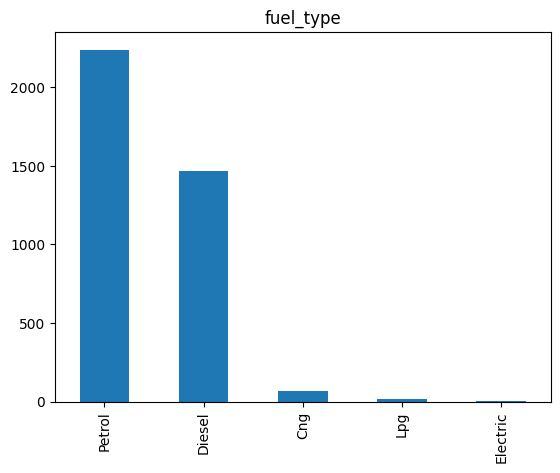

In [40]:
#Fitur Fuel type
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur `fuel_type` dimana 58.9% kendaraan menggunakan bahan bakar berjenis `petrol`.

           jumlah sampel  persentase
Manual              3060        80.5
Automatic            741        19.5


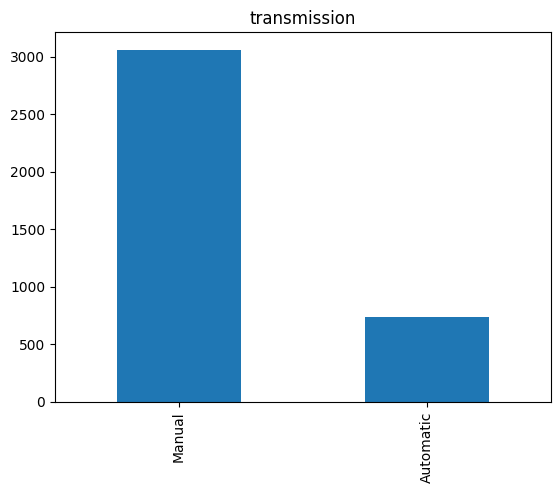

In [41]:
#Fitur transmission
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 2 kategori pada fitur `transmission` dimana 80.5% kendaraan menggunakan tipe transmisi `Manual`.

               jumlah sampel  persentase
Maruti                  1082        28.5
Hyundai                  844        22.2
Honda                    419        11.0
Mahindra                 219         5.8
Tata                     182         4.8
Renault                  138         3.6
Volkswagen               133         3.5
Toyota                   129         3.4
Ford                     118         3.1
Skoda                     89         2.3
Audi                      68         1.8
Nissan                    56         1.5
Chevrolet                 55         1.4
Kia                       46         1.2
Mercedes-Benz             46         1.2
MG                        44         1.2
Jeep                      37         1.0
BMW                       34         0.9
Datsun                    21         0.6
Fiat                      13         0.3
Volvo                      6         0.2
Land                       6         0.2
Mitsubishi                 5         0.1
Isuzu           

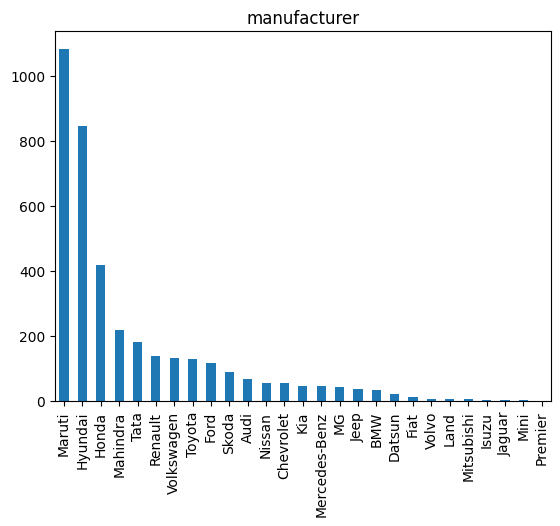

In [42]:
#Fitur manufacturer
feature = categorical_features[3]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 27 kategori `manufacturer` dimana persentase tertinggi yaitu 28.5% adalah kendaraan dari pabrikan `Maruti`.

##### b. Numerical Features

Selanjutnya, untuk fitur numerik, kita akan melihat histogram masing-masing fiturnya.

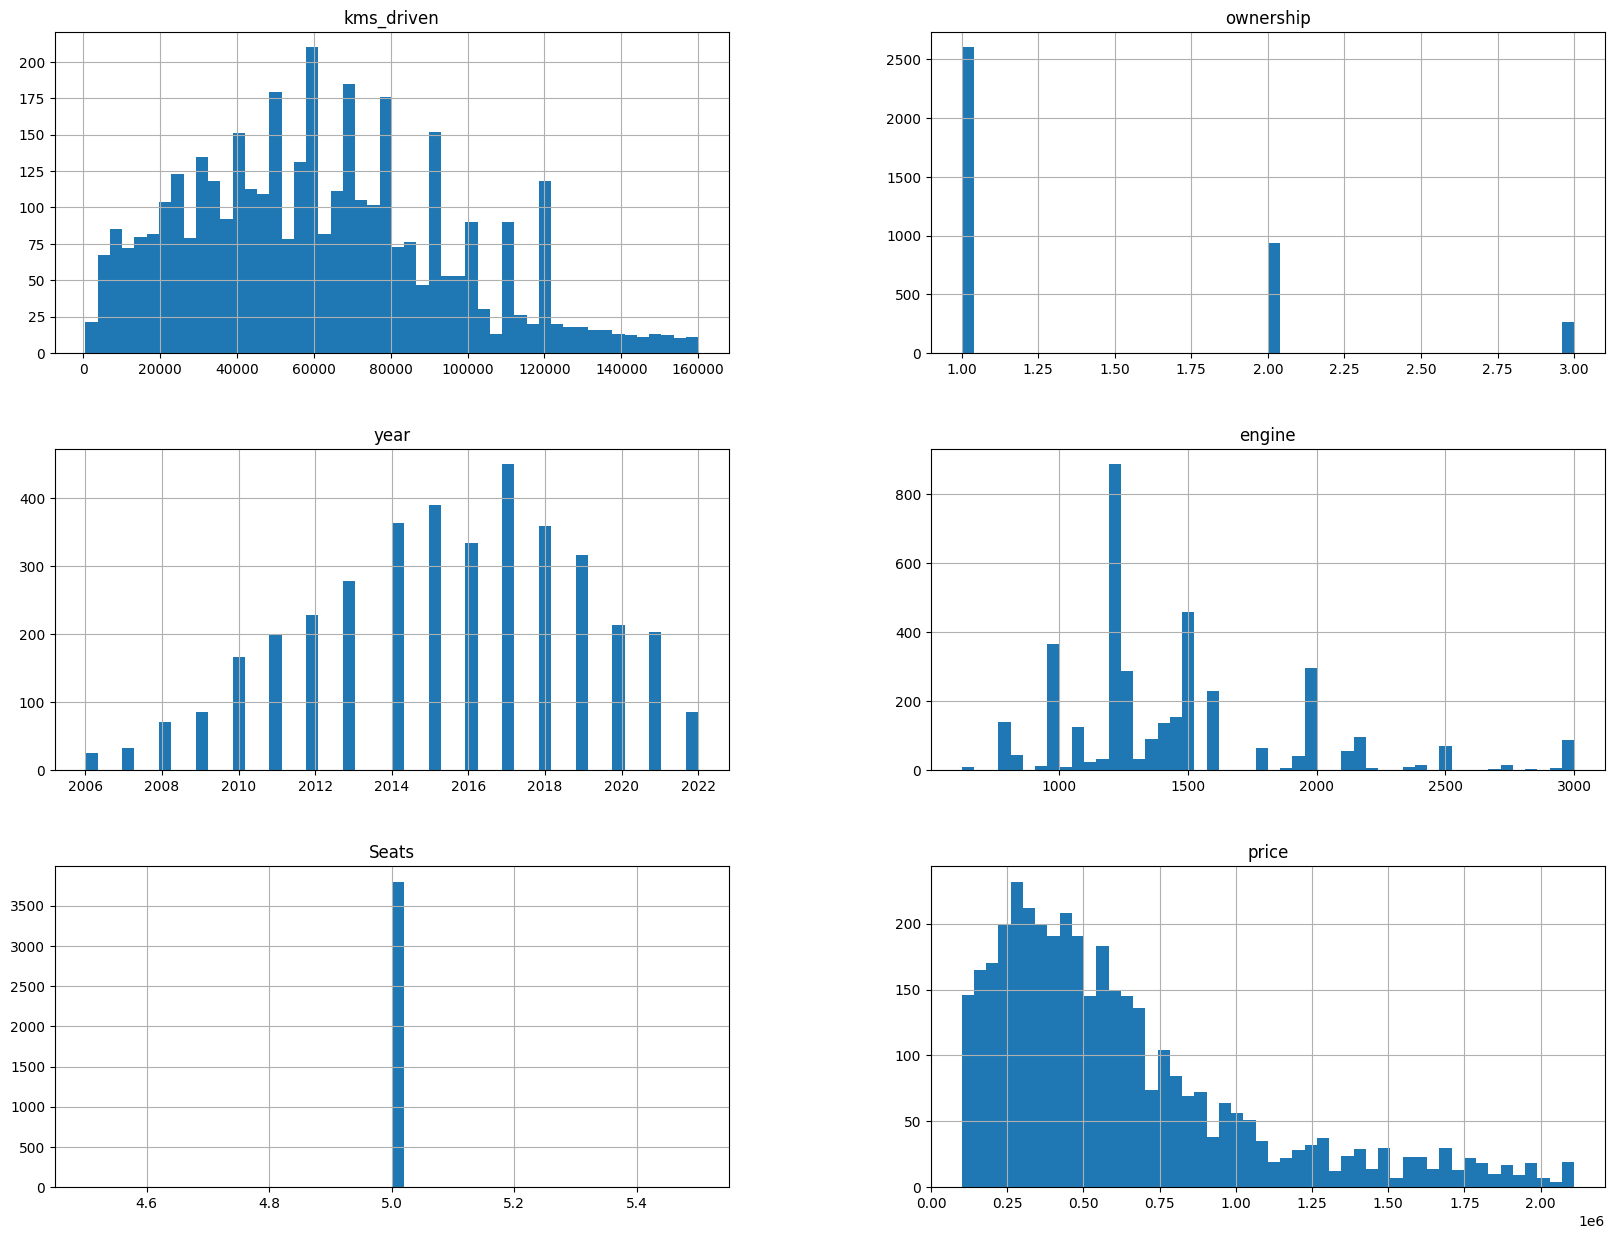

In [43]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

Kita dapat mengamati histogram di atas khususnya `price` yang merupakan fitur targer (label) pada data kita. Dari histogram `price`, dapat diperoleh beberapa informasi diantaranya:
- Peningkatan harga kendaraan sebanding dengan penurunan jumlah sampel. Hal ini dapat dilihat jelas dari histogram `price` yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
- Rentang harga kendaraan cukup tinggi dari skala ratusan ribu rupe hingga lebih dari 2 juta rupee.
- Setengan harga kendaraan bernilai di bawah 1 juta rupee
- Distibusi `price` miring ke kanan (right-skewed) yang akan berimplikasi pada model

#### 3.3.6 Multivariate Analysis

Tahapan selanjutnya yaitu multivarite analysis. Multivariate analysis menunjukkan hubungan anatara dua atau lebih variabel pada data. Sama seperti tahapan pada univariate analysis, kita juga akan melakukan analysis pada categorical features dan numerical features.

##### a. Categorical Features
Pada tahapan ini akan dilakukan pengecekkan rerata `price` terhadap masing-masing fitur untuk mengetahui pengaruh categorical_features terhadap `price`

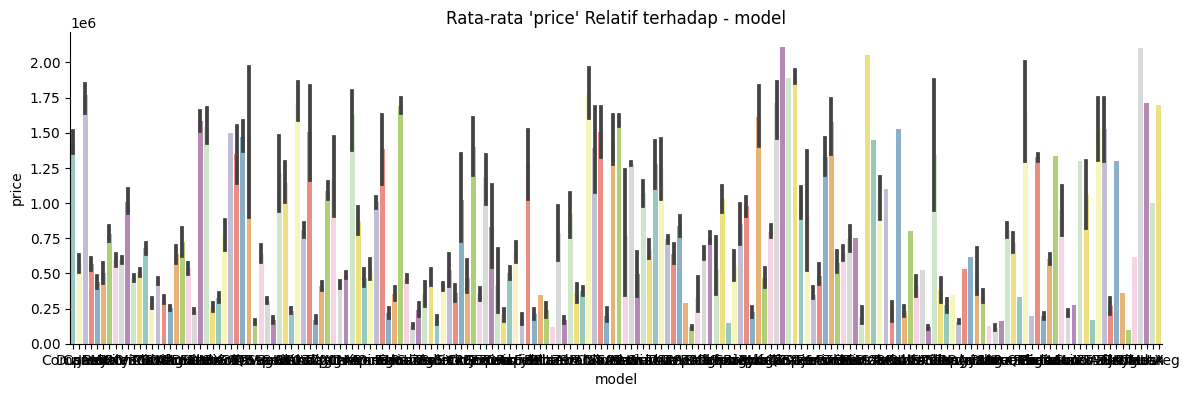

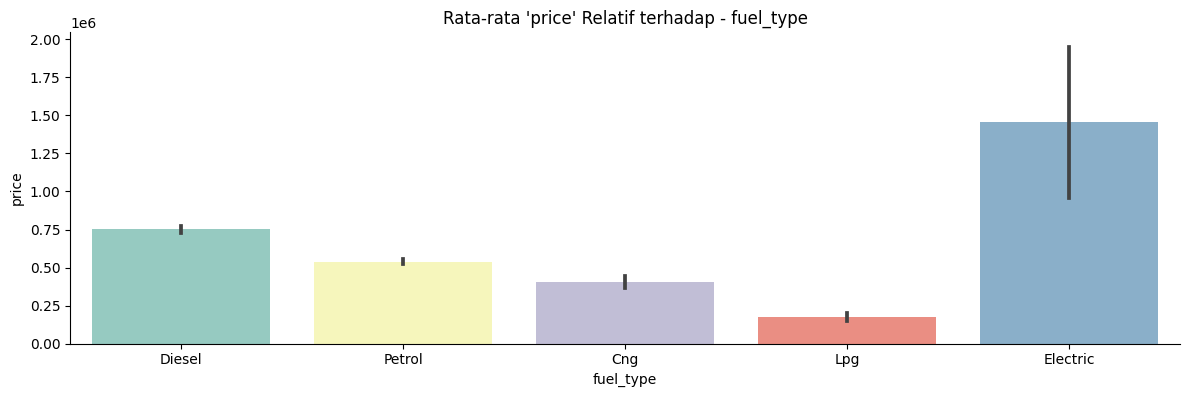

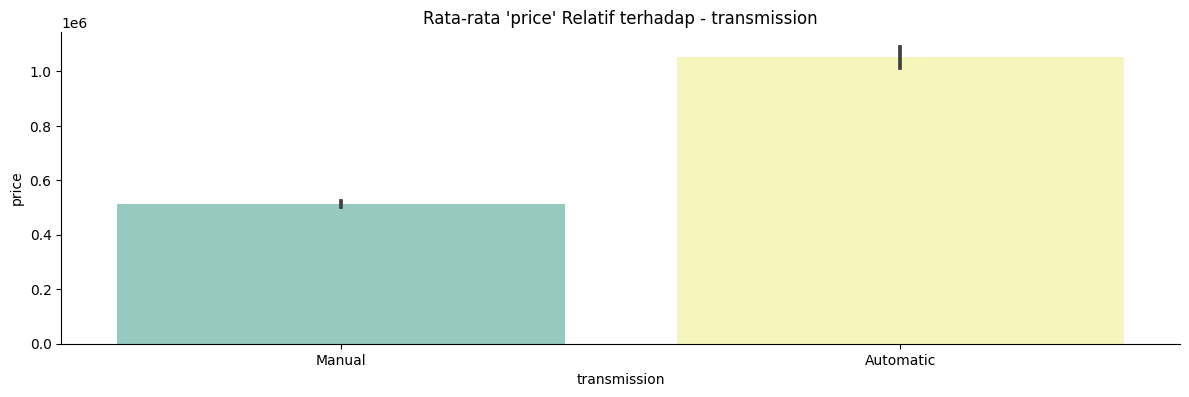

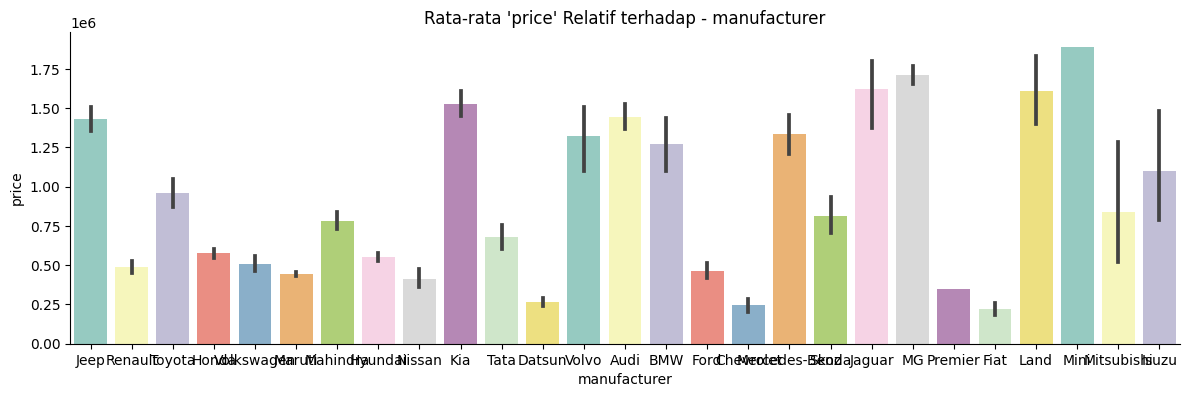

In [44]:
cat_features = data.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Berdasarkan keluaran kode di atas, kita akan memperoleh insight sebagai berikut :
1. Pada fitur `model` rata-ratanya cenderung berbeda-beda. Sehingga pengaruh fitur ini terhadap harga cenderung rendah.
2. Pada fitur `fuel_type` kendaraan yang menggunakan bahan-bakar listrik cenderung memiliki harga yang relatif lebih tinggi dibandingkan kendaraan lainnya.
3. Pada fitur `transmission` kendaraan yang menggunakan transmisi automatic memiliki harga yang lebih tinggi dibandingkan kendaraan bertipe manual.
4. Pada fitur `manufacturer` rata-ratanya cenderung berbeda-beda sehingga pengaruh fitur ini terhadap harga cenderung rendah
5. Kesimpulan akhir : fitur kategori memiliki pengaruh yang rendah terhadap `price`

##### b. Numerical Features

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi `pairplot()`dan melakukan observasi korelasi antara fitur numerik dengan fitur tager menggunakan fungsi corr().

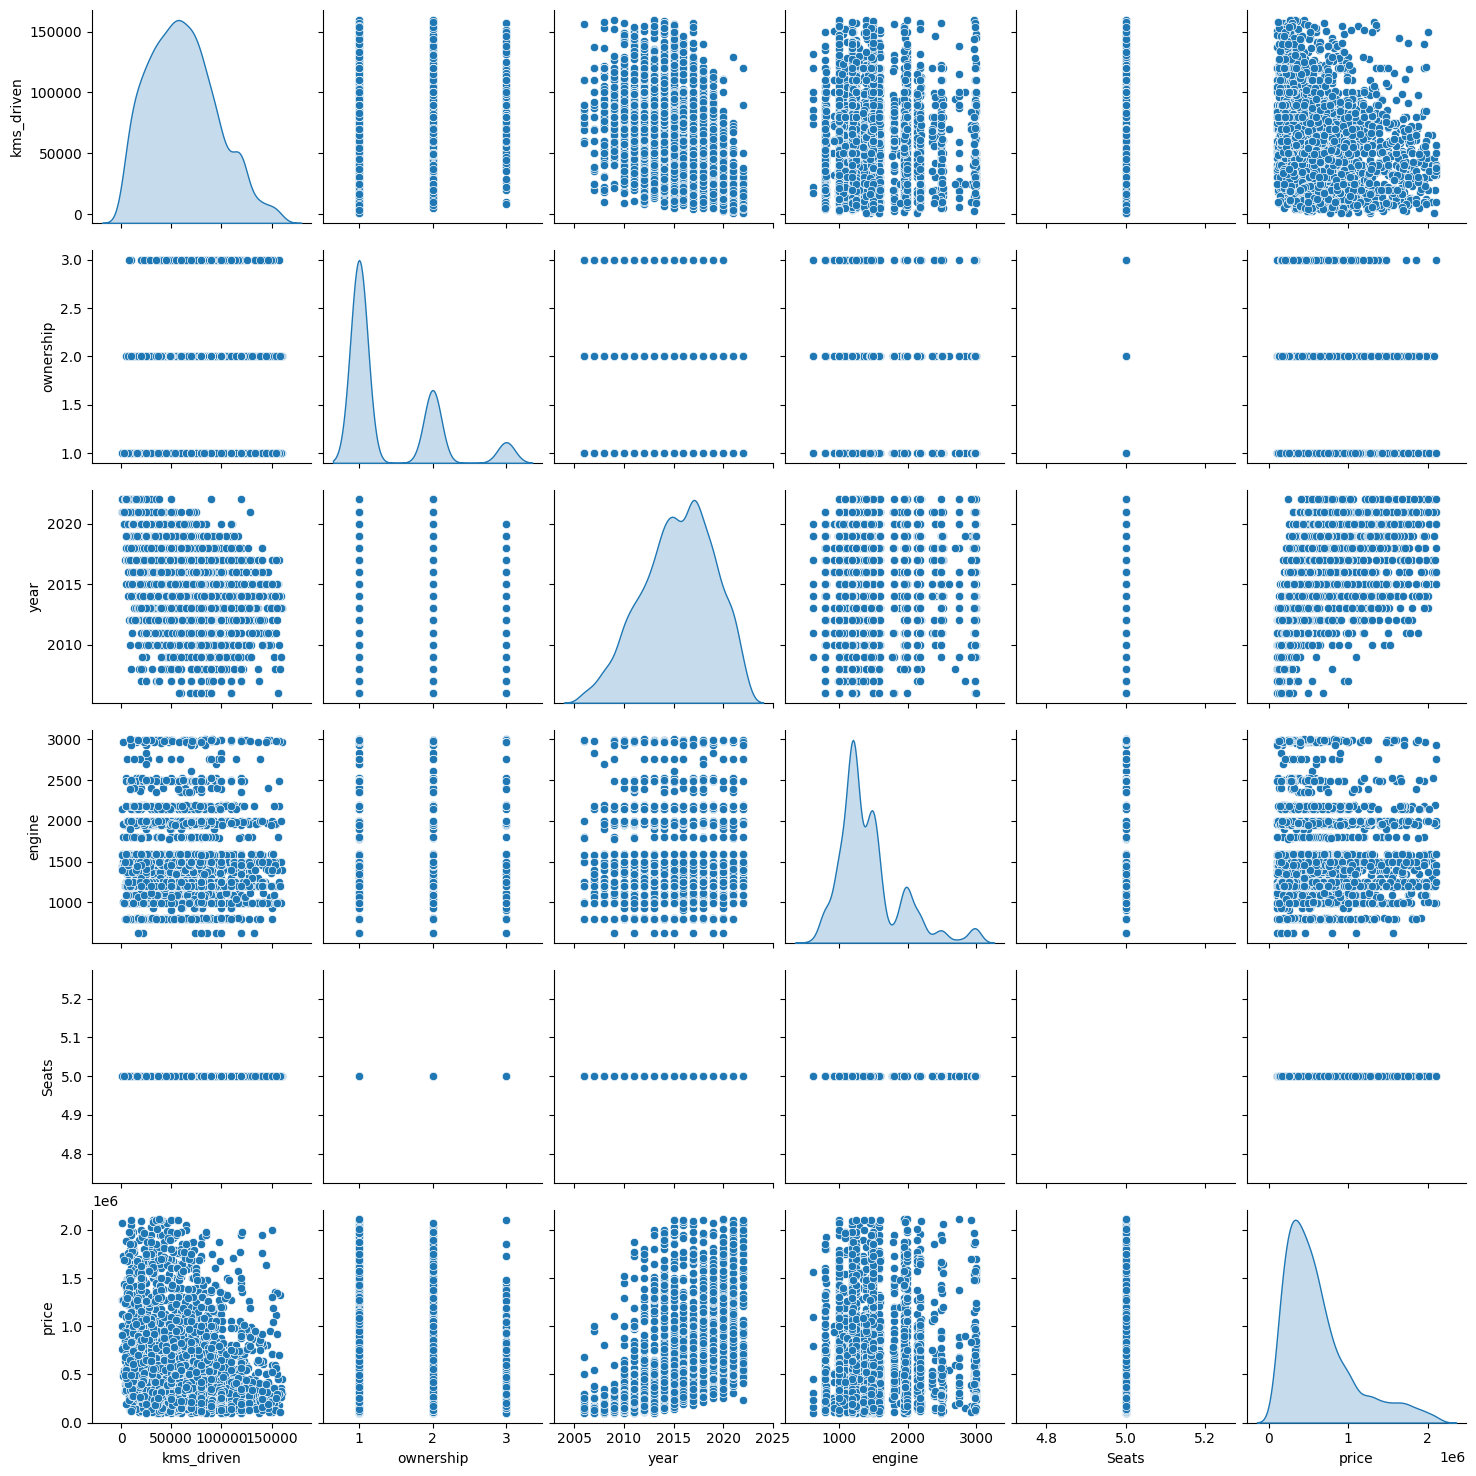

In [45]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(data, diag_kind = 'kde')

Fungsi pairplot tersebut akan menunjukkan relasi pasangan dalam dataset. Dari grafik, kita dapat melihat plot relasi masing-masing fitur numerik pada dataset.

Dapat kita lihat pada fitur target `price` (sumbu y = price) yang berada pada baris terakhir.

Korelasi pada fitur tampak dari adanya pola sebaran data, Sebaran data acak merupakan indikasi korelasi yang lemah atau tidak ada korelasi sama sekali. Sedangkan, sebaran data yang memiliki pola tidak acak merupakan indikasi adanya korelasi.

Untuk mengetahui skor korelasinya kita dapat menggunakan fungsi corr()

<ipython-input-46-5ff959f2f38a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

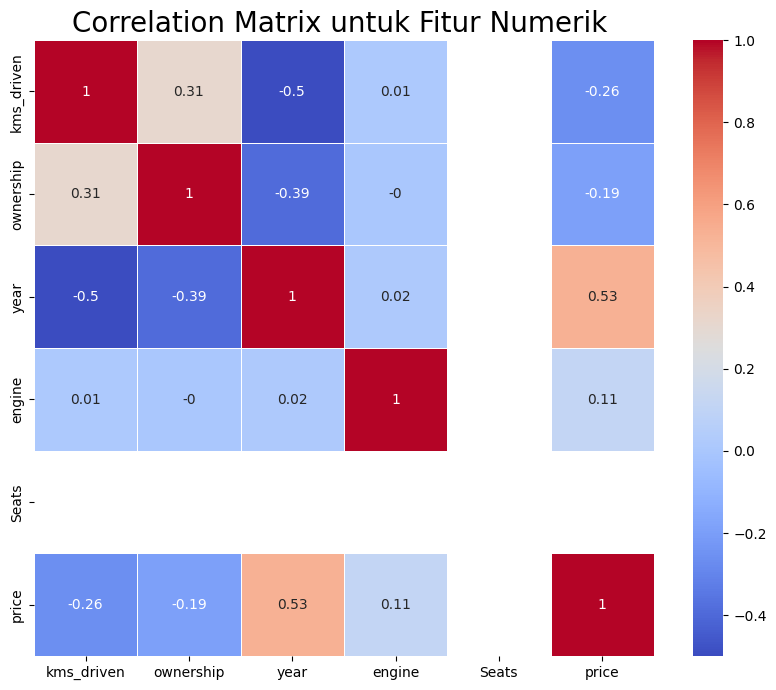

In [46]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Terlihat bahwa fitur `year` memiliki korelasi yang tinggi diantara 4 fitur lainnya. sedangkan korelasi terendah adalah fitur `engine`. Disini kita tidak akan melakukan dropping tapi akan menggunakan semua fitur tersebut.

##3.4 Encoding Fitur Kategori

Untuk melakukan encoding fitur kategori, salah satu teknik yang umum digunakan adalah teknik **one-hot-encoding**. Library Sklearn menyediakan fungsi ini untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori. Dalam dataset ini kita memiliki 4 fitur kategori yaitu  `model`, `fuel_type`, `transmission`, dan `manufacturer`. Kita akan melakukan proses encoding ini dengan fitur `get_dummies`.

In [47]:
from sklearn.preprocessing import  OneHotEncoder
data = pd.concat([data, pd.get_dummies(data['model'], prefix='model')],axis=1)
data = pd.concat([data, pd.get_dummies(data['fuel_type'], prefix='fuel_type')],axis=1)
data = pd.concat([data, pd.get_dummies(data['transmission'], prefix='transmission')],axis=1)
data = pd.concat([data, pd.get_dummies(data['manufacturer'], prefix='manufacturer')],axis=1)
data.drop(['model', 'fuel_type', 'transmission', 'manufacturer'], axis=1, inplace=True)
data.head()

,kms_driven,ownership,year,engine,Seats,price,model_3,model_5,model_7,model_800,...,manufacturer_Mini,manufacturer_Mitsubishi,manufacturer_Nissan,manufacturer_Premier,manufacturer_Renault,manufacturer_Skoda,manufacturer_Tata,manufacturer_Toyota,manufacturer_Volkswagen,manufacturer_Volvo
0,86226,1,2017,1956,5,1003000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13248,1,2021,1330,5,1283000.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,60343,1,2016,2494,5,1640000.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,26696,1,2018,1199,5,777000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69414,1,2016,1199,5,515000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Sekarang, variabel kategori kita telah berubah menjadi variabel numerik

##3.5 Reduksi Dimensi dengan PCA
Teknik reduksi merupakan prosedut untuk mengurangi sejumlah fitur dengan tetap mempertahankan informasi pada data. Teknik reduksi yang paling populer adalah principle component analysis (PCA). Teknik ini digunakan untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari "n-dimensional space" ke dalam sistem berkoordinat baru dengan dimensi m, dimana m lebih kecil dari n.

PCA ini bekerja menggunakan metode aljabar linier. Dimana ia mengasumsikan bahwa sekumpulan data pada arah dengan varians terbesar merupakan yang paling penting atau utama. PCA umumnya digunakan ketika variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. Oleh karena itu, PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier. Komponen utama dapat menangkap sebagian besar varians dalam variabel asli. Sehingga PCA yang diterapkan pada data, hanya akan menggunakan komponen utama dan mengabaikan sisanya.

Seperti yang kita tahu ketika beberapa fitur memiliki korelasi yang tinggi terhadap price, berarti fitur tersebut memuat informasi yang sama. Contohnya Tahun Pembuatan dan Kilometer kendaraan yang memuat informasi terkait masa pakai kendaraan.

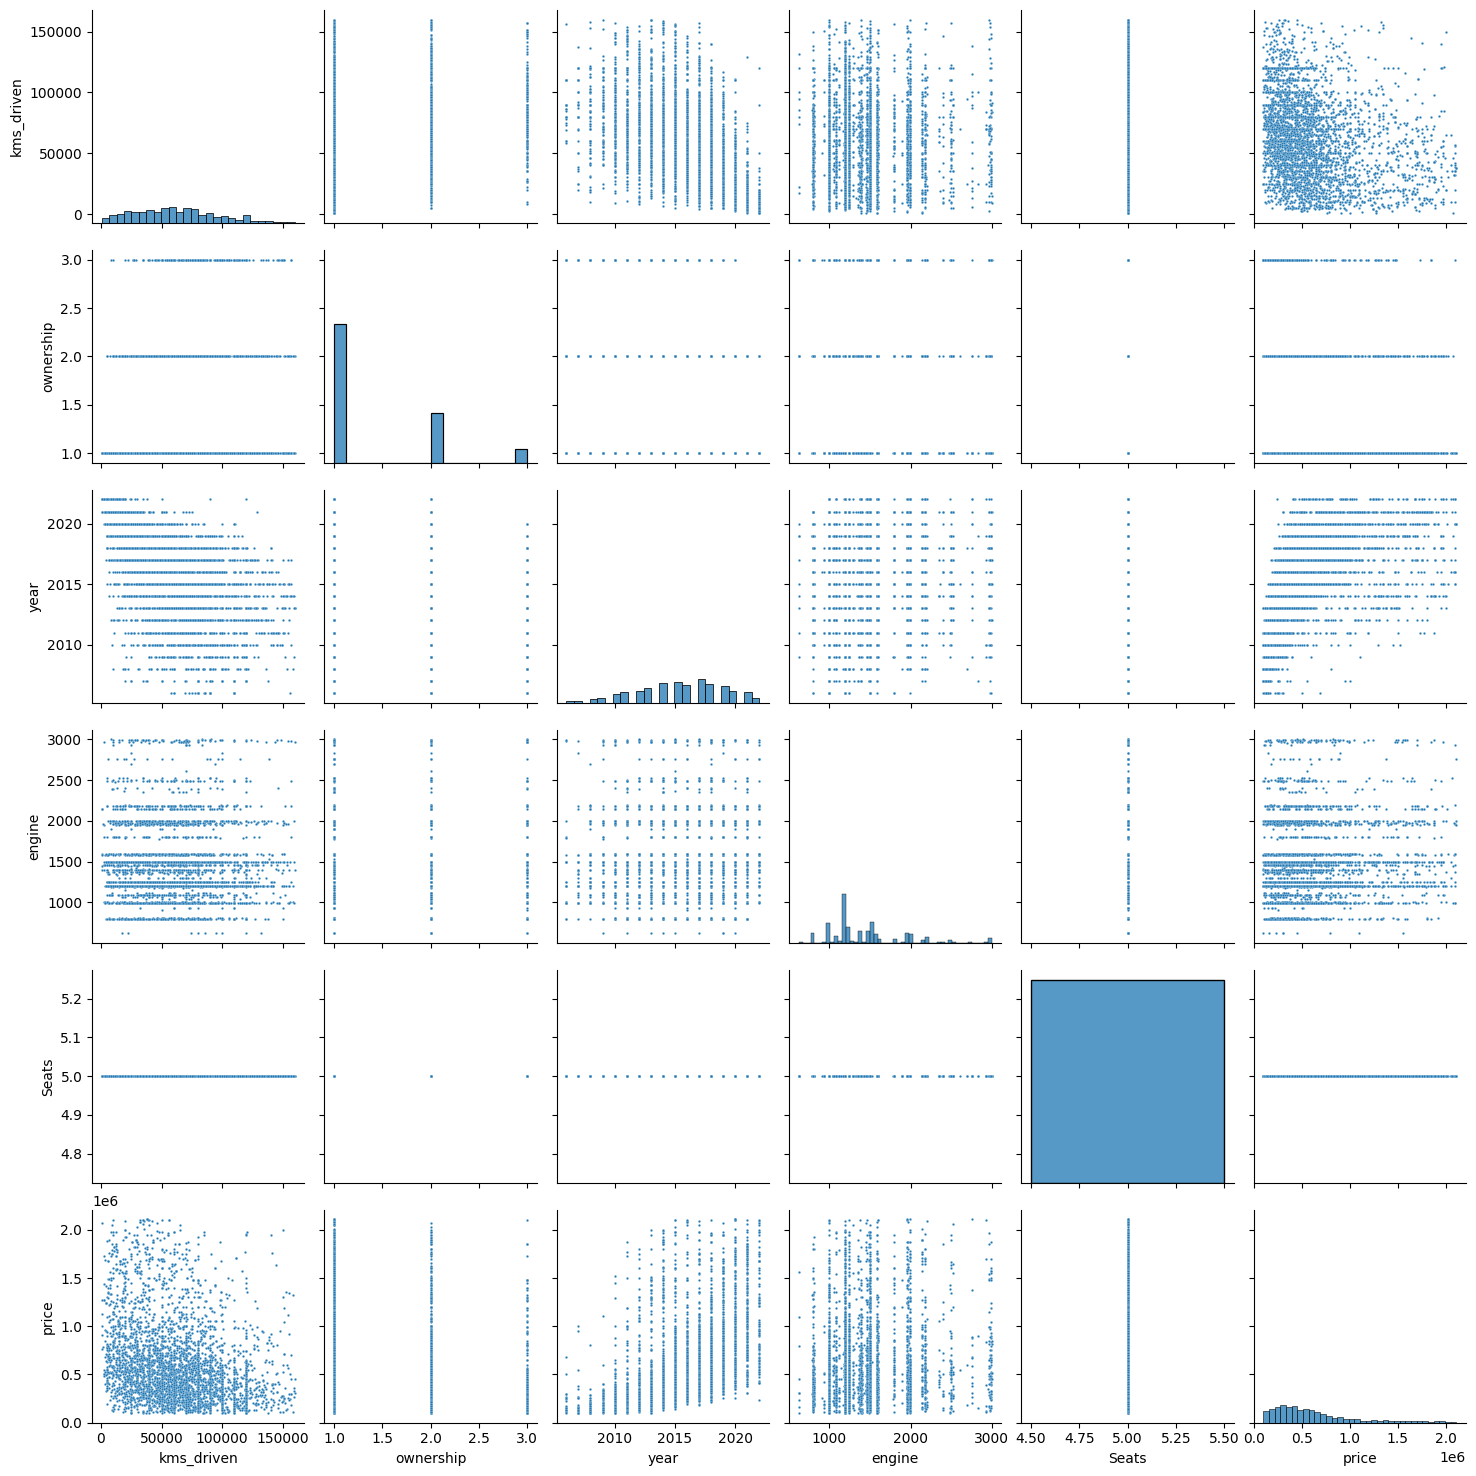

In [48]:
sns.pairplot(data[['kms_driven', 'ownership', 'year', 'engine', 'Seats', 'price']], plot_kws={"s": 3});

In [49]:
#mengaplikasikan class PCA dari sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=4, random_state=123)
pca.fit(data[['kms_driven', 'ownership', 'year', 'engine']])
princ_comp = pca.transform(data[['kms_driven', 'ownership', 'year', 'engine']])

Pada kode di atas, parameter n_components merupakan jumlah komponen atau dimensi dalam kasus kita jumlahnya ada 4. Sedangkan random_state berfungsi untuk mengontrol random number generator yang digunakan berupa bilangan integer yang nilainya bebas. Berapapun nilainya, selama itu merupakan bilangan integer maka ia akan memberikan hasil yang sama setiap kali dilakukan pemanggilan fungsi.

Apabila random_state tidak ditentukan maka tiap kali melakukan split, akan didapatkan data train, dan test yang berbeda.

Setelah menerapkan PCA, kita dapat mengetahui proporsi informasi dari keempat komponen tadi

In [50]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0., 0.])

Arti dari keluaran kode di atas yaitu 100% informasi pada keempat fitur terdapat pada PC pertama. Sehingga tidak perlu dilakukan reduksi dimensi.

##3.6 Train-Test-Split

Proporsi pembagian data train dan test bisanya adalah 80:20. Tujuan dari adanya data test adalah untuk mengukur kinerja model pada data baru. Pada proyek ini kita akan melakukan proporsi pembagian sebesar 90:10 dengan menggunakan fungsi train_test_split dari sklearn.

In [51]:
from sklearn.model_selection import train_test_split

X = data.drop(["price"],axis =1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Untuk mengecek jumlah sampel pada masing-masing bagian, kita dapat menggunakan kode berikut

In [52]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3801
Total # of sample in train dataset: 3420
Total # of sample in test dataset: 381


##3.6 Standardisasi
Standardisasi adalah teknik transformasi yang umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one hot-encidng seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library sklearn.

StarndardScaler melakukan proses standardisasi dengan mengurangi mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler ini menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Kita hanya akan menerapkan fitur standardisasi pada data latih saja untuk menghindari kebocoran informasi pada data uji. Barulah pada tahap evaluasi kita akan melakukan standardisasi pada data uji.

In [53]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['kms_driven', 'ownership', 'year', 'engine']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,kms_driven,ownership,year,engine
2860,-1.302837,-0.62887,0.718161,2.370391
1942,1.076100,1.00171,-0.687258,0.126546
4691,1.256364,1.00171,-0.406174,-0.525175
729,-0.053895,-0.62887,-0.125091,-0.529549
994,0.719260,-0.62887,-1.249426,-1.406530


In [54]:
X_train[numerical_features].describe().round(4)

,kms_driven,ownership,year,engine
count,3420.0000,3420.0000,3420.0000,3420.0000
mean,-0.0000,0.0000,0.0000,-0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-1.8203,-0.6289,-2.6548,-1.7827
25%,-0.7766,-0.6289,-0.6873,-0.5295
50%,-0.0539,-0.6289,0.1560,-0.4180
75%,0.6300,1.0017,0.7182,0.3124
max,2.9198,2.6323,1.8425,3.4114


Terbukti bahwa proses standardisasi mengubah mean menjadi 0 dan standar deviasi menjadi 1.

#4. Model Development

Dalam tahapan ini kita akan mengembangkan machine learning dengan tiga algoritma dan akan dilakukan evaluasi pada ketiganya untuk mengetahui algoritma mana yang dapat memberikan hasil prediksi terbaik. ALgoritma yang digunakan diantaranya:
1. K-Nearest Neighbor
2. Random Forest
3. Boosting Algorithm

##4.1 Algoritma K-Nearest Neighbor (KNN)

Algoritma ini akan bekerja pada data baru dimana setiap data baru akan diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan. KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif).

Memilih nilai k yang lebih besar dapat membantu menghindari overfit, meskipun terkadang menyebabkan kehilangan kemampuan prediksi. Ketika memilih nilai k=1 maka hasilnya akan sangat kaku sedangkan nilai k yang besar hasil prediksi akan lebih halus.

- k terlalu rendah = overfit, hasil prediksi varians nya tinggi
- k terlalu tinggi = underfit, prediksi memiliki bias yang tinggi

Untuk menentukan titik mana dalam data yang paling mirip dengan input baru, KNN menggunakan perhitungan ukuran jarak dimana metrik yang digunakan secara default pada library sklearn adalah Euclidean Distance metrik lain yang sering dipakai adalah Minkowski dan Manhattan distance.

Untuk memulai pembuatan ketiga model kita akan menyiapkan data frame

In [55]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])


In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Kita menggunakan k=10 dengan metrik Euclidean. Oada tahapan ini kita hanya melatih data training dan menyimpan data testing untuk tahap evaluasi nantinya.

Dibalik kemudahannya, KNN memiliki kekurangan apabila dihadapkan pada jumlah fitur atau dimensi yang besar. Permasalahan tersebut disebut *curse of dimensionality* dimana terjadi ketika jumlah sampel meningkat secara eksponensial seiiring dengan jumlah fitur pada pada.

***Maka syarat utama menggunakan KNN adalah fitur pada data sedikit**

##4.2 Algoritma Random Forest

Algortima ini merupakan salah satu model machine learning berkategori ensemble (group) learning. Maksudnya yaitu model ini terdiri dari beberapa model yang bekerja secara bersama-sama sehingga tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada ensemble, tiap model harus membuat prediksi secara independen, lalu hasilnya akan digabungkan untuk membuat prediksi akhir.

Untuk membuat model ensemble ada dua teknik pendekatan:
1. Bagging atau Bootstrap Aggregating
2. Boosting

`Bagging atau Bootstrap aggregating` yaitu teknik yang melatih model dengan sampel random. Dalam teknik ini model dilatih dengan teknik proses sampling dengan penggantian. Sampel dengan nilai yang berbeda bersifat independen, artinya nilai suatu sampel tidak mempengaruhi sampel lainnya [28]. Akibatnya model yang dilatih akan berbeda antara satu dan lainnya.

Salah satu algoritma yang cocok dengan teknik bagging adalah decision tree. Misalnya, ada 200 model decision tree pada bag random forest kita, ini berarti bahwa keputusan (decision) yang dibuat oleh setiap pohon (model) akan sangat bervariasi. Pada kasus klasifikasi, prediksi akhir diambil dari prediksi terbanyak pada seluruh pohon. Sedangkan, pada kasus regresi, prediksi akhir adalah rata-rata prediksi seluruh pohon dalam model ensemble.

**Maka algoritma ini disebut random forest karena tersusun dari banyak algoritma decision tree yang pembagian data dan fiturnya dipilih secara acak.**

In [57]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Dari kode di atas kita akan mengimpor **RandomForestRegressor** library ensemble dari sklearn, dan MSE sebagai metrik untuk evaluasi performa model. Berikut merupakan beberapa nilai parameter dari RandomForestRegressor

- n_estimator: jumlah trees kita atur 50
- max_depth: panjang atau kedalaman pohon adalah ukuran seberapa banyak pohon dapat splitting untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan
- random_state : digunakan untuk mengontrol random number generator yang digunakan
- n_jobs: jumlah job yang digunakan secara paralel yaitu komponen untuk mengontrol thread atau proses yang berjalan secara paralel. Nilai -1 artinya semua proses berjalan secara paralel.

##4.3 Boosting Algorithm

Boosting merupakan model ensemble yang melatih model secara berurutan (tidak paralel). Ia akan membangun model dari data latih. Kemudian, ia akan membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model terus ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan.

**Algoritma ini sangat powerful dalam meningkatkan akurasi prediksi. Algoritma boosting sering mengungguli model yang lebih sederhana seperti logistic regression dan random forest.***

Dilihat dari caranya memperbaiki kesalahan pada model sebelumnya, algoritma boosting terdiri dari dua metode:

- Adaptive boosting
- Gradient boosting

**Adaptive boosting** adalah metode boosting yang memperbaiki kesalahan pada model sebelumnya dengan memberikan bobot yang lebih tinggi pada data yang salah diklasifikasikan. Bobot ini akan terus diperbarui di setiap iterasi, sehingga model yang dihasilkan akan semakin akurat.

Pada iterasi pertama, model lemah akan dilatih pada data dengan bobot yang sama. Model ini akan memberikan prediksi untuk setiap data. Data yang salah diklasifikasikan akan diberikan bobot yang lebih tinggi pada iterasi selanjutnya.

Pada iterasi selanjutnya, model lemah baru akan dilatih pada data dengan bobot yang diperbarui. Model ini akan dirancang untuk memperbaiki kesalahan yang dilakukan oleh model lemah sebelumnya.

Proses ini akan terus berulang-ulang hingga kesalahan pada model sebelumnya dapat diminimalkan.

**Gradient boosting** adalah metode boosting yang memperbaiki kesalahan pada model sebelumnya dengan menambahkan model baru yang dirancang untuk mengurangi gradien loss function. Loss function adalah fungsi yang mengukur kesalahan model.

Pada iterasi pertama, model lemah akan dilatih pada data. Model ini akan memberikan prediksi untuk setiap data.

Pada iterasi selanjutnya, model baru akan dilatih pada data yang salah diklasifikasikan oleh model lemah sebelumnya. Model baru ini akan dirancang untuk mengurangi gradien loss function.

Proses ini akan terus berulang-ulang hingga gradien loss function dapat diminimalkan.


AdaBoost dan gradient boosting memiliki beberapa perbedaan, antara lain:

- `Cara memperbaiki kesalahan`: AdaBoost memperbaiki kesalahan dengan memberikan bobot yang lebih tinggi pada data yang salah diklasifikasikan. Gradient boosting memperbaiki kesalahan dengan menambahkan model baru yang dirancang untuk mengurangi gradien loss function.
-`Model yang digunakan`: AdaBoost dapat menggunakan berbagai model lemah, seperti pohon keputusan, regresi linear, dan jaringan saraf tiruan. Gradient boosting biasanya menggunakan pohon keputusan sebagai model lemah.
- `Performance`: AdaBoost umumnya lebih cepat daripada gradient boosting.


Pada proyek ini kita akan menggunakan metode adaptive boosting yaitu AdaBoost. Awalnya, semua kasus dalam data latih memiliki weight atau bobot yang sama. Pada setiap tahapan, model akan memeriksa apakah observasi yang dilakukan sudah benar? Bobot yang lebih tinggi kemudian diberikan pada model yang salah sehingga mereka akan dimasukkan ke dalam tahapan selanjutnya. Proses iteratif ini berlanjut sampai model mencapai akurasi yang diinginkan.

In [58]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Pada kode tersebut, learning_rate merupakan bobot yang diterapkan pada setiap regressor masing-masing proses iterasi boosting sedangkan random_state digunakan untuk mengontrol random_number yang digunakan.

#5. Evaluasi Model

Metrik yang digunakan dalam prediksi ini adalah MSE yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi. Berikut merupakan formula dari MSE

![link text](https://miro.medium.com/v2/resize:fit:1198/1*BtVajQNj29LkVySEWR_4ww.png
)

Sebelum melakukan perhitungan MSE, perlu dilakukan scaling pada fitur numerik pada data uji. Setelah model selesai kita latih dengan 3 algoritma, kita perlu melakukan proses scaling terhadap data uji. Hal tersebut dilakukan agar skala antara data latih dan data uji sama dan bisa kita lakukan evaluasi.

##5.1 Scalling Data Test

In [59]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

##5.2 Model Evaluation

In [60]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    #kita membagi dengan ie3 agar nilai MSE berada dalam skala yang tidak terlalu besar
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,28627149.622807,39081856.036745
RF,8186460.98419,31265848.653358
Boosting,74340506.211746,83596059.251609


Untuk memudahkan, kita akan membuat plot metrik tersebut dengan bar chart

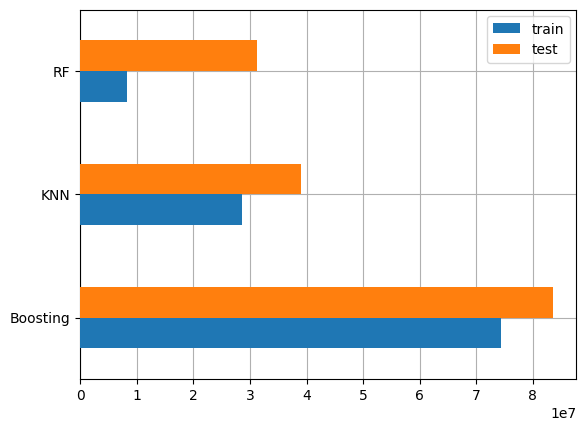

In [61]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil pada data train dan test. Sedangkan model dengan algoritma Boosting memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 8e7). Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi harga kendaraan.

Kita akan menguji ketiganya untuk membuat prediksi menggunakan beberapa harga dari dataset

In [62]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}
r2_scores = {'Model': [], 'R2 Score': []}

for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

    # Menghitung R2 score
    r2 = model.score(X_test, y_test)
    r2_scores['Model'].append(name)
    r2_scores['R2 Score'].append(r2)

result_df = pd.DataFrame(pred_dict)
r2_df = pd.DataFrame(r2_scores)

print("Hasil Prediksi:")
print(result_df)
print("\nR2 Scores:")
print(r2_df)


Hasil Prediksi:
        y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting
3267  333000.0      384700.0     368522.6           470922.6

R2 Scores:
      Model  R2 Score
0       KNN  0.797111
1        RF  0.837687
2  Boosting  0.566021


Terlihat bahwa prediksi random forest memberikan hasil yang paling mendekati dengan nilai sebenarnya.